In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Set Pandas to display all columns
pd.set_option('display.max_columns', None)

# Introduction

- Customer churn refers to the loss of customers over a specific period.
- In this project, I will prioritize **Recall** instead of **Precision** and **Accuracy**, my goal is to capture as many actual churn cases as possible, even if it means predicting some non-churners as churners. This is crucial when:
  - The cost of losing a churned customer is high.
  - From that, company will prevent churn by offering retention strategies.



# Import Dataset

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6184,3413-CSSTH,Male,0,No,No,41,Yes,Yes,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),55.70,2237.55,No
6176,0475-RIJEP,Male,0,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,77.85,3365.85,Yes
2210,7036-TYDEC,Female,0,No,No,69,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,104.00,7028.5,No
709,3347-YJZZE,Male,0,Yes,Yes,29,Yes,Yes,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),80.10,2211.8,No
625,3003-CMDUU,Female,0,Yes,No,25,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,95.15,2395.7,No


<div align="center">

| Column | Description |
|------|---------|
| **gender** | Giới tính của khách hàng. |
| **Partner** | Khách hàng có vợ/chồng không. |
| **Dependents** | Khách hàng có người phụ thuộc không. |
| **PhoneService** | Khách hàng có sử dụng dịch vụ điện thoại không. |
| **MultipleLines** | Khách hàng có nhiều đường dây điện thoại không. |
| **InternetService** | Loại dịch vụ internet khách hàng sử dụng. |
| **OnlineSecurity** | Dịch vụ bảo mật trực tuyến. |
| **OnlineBackup** | Dịch vụ sao lưu trực tuyến. |
| **DeviceProtection** | Dịch vụ bảo vệ thiết bị. |
| **TechSupport** | Dịch vụ hỗ trợ kỹ thuật. |
| **StreamingTV** | Dịch vụ xem TV trực tuyến. |
| **StreamingMovies** | Dịch vụ xem phim trực tuyến. |
| **Contract** | Loại hợp đồng khách hàng đăng ký. |
| **PaperlessBilling** | Khách hàng có sử dụng hóa đơn điện tử không. |
| **PaymentMethod** | Phương thức thanh toán của khách hàng. |
| **TotalCharges** | Tổng số tiền khách hàng đã thanh toán. |
| **Churn** | Khách hàng có rời bỏ dịch vụ không. |

</div>


---

# Helper Func

In [3]:
def print_uniqueVals(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col :<20}:', df[col].unique())

---

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Notice that `TotalCharges` column is **object** type but it contains numeric values

In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') # If ‘coerce’, then invalid parsing will be set as NaN.

In [6]:
df.TotalCharges.isnull().sum()

11

- There are 11 null values after casting, so I will drop those records

In [7]:
df.dropna(subset='TotalCharges', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

- It's okay now

---

# Feature Selection

- First, drop customerID column, because it's no use for Prediction

In [9]:
df.drop('customerID', axis=1, inplace = True)

In [10]:
print_uniqueVals(df)

gender              : ['Female' 'Male']
Partner             : ['Yes' 'No']
Dependents          : ['No' 'Yes']
PhoneService        : ['No' 'Yes']
MultipleLines       : ['No phone service' 'No' 'Yes']
InternetService     : ['DSL' 'Fiber optic' 'No']
OnlineSecurity      : ['No' 'Yes' 'No internet service']
OnlineBackup        : ['Yes' 'No' 'No internet service']
DeviceProtection    : ['No' 'Yes' 'No internet service']
TechSupport         : ['No' 'Yes' 'No internet service']
StreamingTV         : ['No' 'Yes' 'No internet service']
StreamingMovies     : ['No' 'Yes' 'No internet service']
Contract            : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling    : ['Yes' 'No']
PaymentMethod       : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn               : ['No' 'Yes']


- Notice that `MultipleLines` column includes `PhoneService`, so I will drop it

In [11]:
df.drop('PhoneService', axis=1, inplace = True)

### Correlation between `Tenure`, `MonthlyCharges` & `TotalCharges`

In [12]:
corr_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
corr_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


- Notice that `TotalCharges` is highly correlated with `Tenure` and `MonthlyCharges`, so I will drop `TotalCharges`

In [13]:
df.drop('TotalCharges', axis=1, inplace = True)

### Visualization between some Features (which can be ignored) and Target

In [14]:
df_churnNo = df[df.Churn=='No']
df_churnYes = df[df.Churn=='Yes']

df_churnNo.shape, df_churnYes.shape

((5163, 18), (1869, 18))

In [15]:
skippable_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'PaymentMethod']

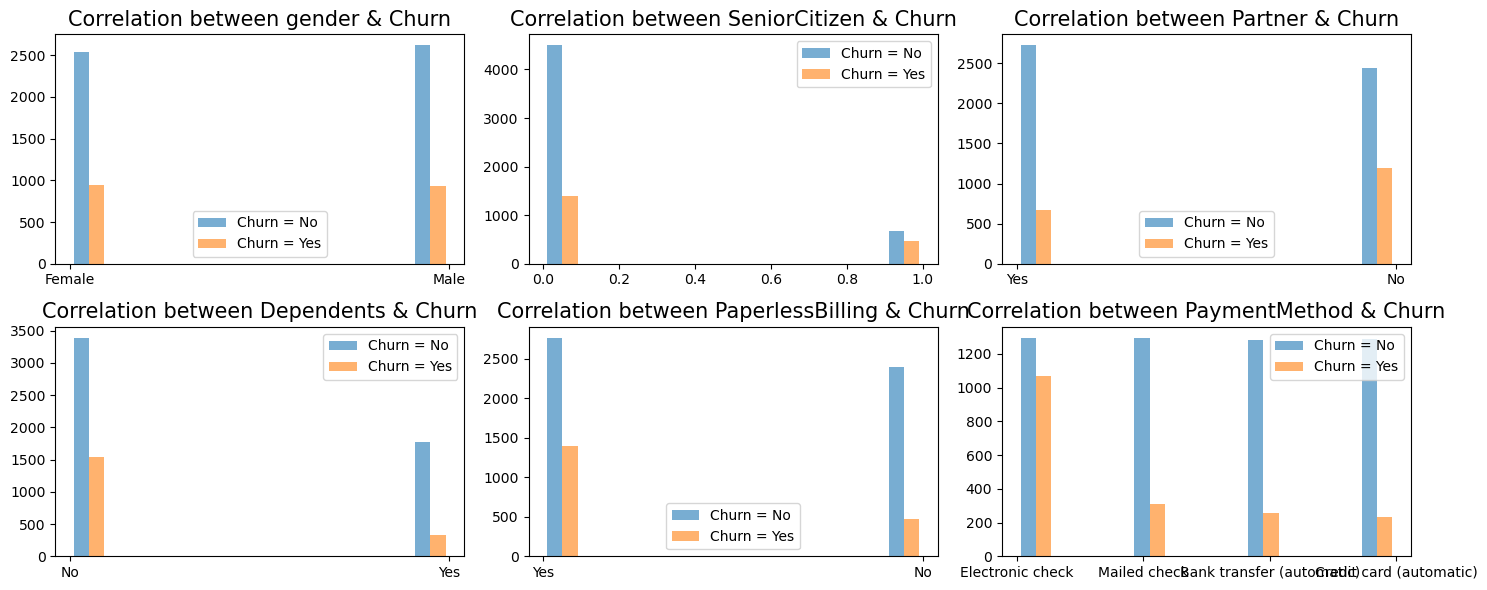

In [16]:
cols = 3
rows = int(np.ceil(len(skippable_cols) / cols))

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 3 * rows))
axes = axes.flatten()

for i, col in enumerate(skippable_cols):
    ax = axes[i]

    ax.hist([df_churnNo[col], df_churnYes[col]],
            label=['Churn = No', 'Churn = Yes'],
            alpha=0.6)

    ax.legend()
    ax.set_title(f'Correlation between {col} & Churn', fontsize=15)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- From the image, `gender` seems to have nearly identical distributions for `Churn = No` and `Churn = Yes`. This suggests that gender does not contribute much to predicting churn and could be dropped.

- Other categorical variables show more variation between churned and non-churned customers, so they might be more useful.

In [17]:
df.drop('gender', axis=1, inplace = True)

---

# Data Preprocessing

### Label Encoding

In [18]:
print_uniqueVals(df)

Partner             : ['Yes' 'No']
Dependents          : ['No' 'Yes']
MultipleLines       : ['No phone service' 'No' 'Yes']
InternetService     : ['DSL' 'Fiber optic' 'No']
OnlineSecurity      : ['No' 'Yes' 'No internet service']
OnlineBackup        : ['Yes' 'No' 'No internet service']
DeviceProtection    : ['No' 'Yes' 'No internet service']
TechSupport         : ['No' 'Yes' 'No internet service']
StreamingTV         : ['No' 'Yes' 'No internet service']
StreamingMovies     : ['No' 'Yes' 'No internet service']
Contract            : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling    : ['Yes' 'No']
PaymentMethod       : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn               : ['No' 'Yes']


- Binary Encoding

In [19]:
df.replace('No internet service', 'No', inplace=True)

In [20]:
binary_cols = ['Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

- Ordinal Encoding

In [21]:
print_uniqueVals(df)

MultipleLines       : ['No phone service' 'No' 'Yes']
InternetService     : ['DSL' 'Fiber optic' 'No']
Contract            : ['Month-to-month' 'One year' 'Two year']
PaymentMethod       : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
df[['MultipleLines']] = df[['MultipleLines']].apply(lambda x: x.map({'Yes': 2, 'No': 1, 'No phone service': 0}))

### One Hot Encoding

In [23]:
cols_ohe = ['InternetService', 'Contract', 'PaymentMethod']
df_dummies = pd.get_dummies(df, columns=cols_ohe, drop_first=True, dtype='int64')

In [24]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   MultipleLines                          7032 non-null   int64  
 5   OnlineSecurity                         7032 non-null   int64  
 6   OnlineBackup                           7032 non-null   int64  
 7   DeviceProtection                       7032 non-null   int64  
 8   TechSupport                            7032 non-null   int64  
 9   StreamingTV                            7032 non-null   int64  
 10  StreamingMovies                        7032 non-null   int64  
 11  Paperless

### Scaling

In [25]:
df_dummies.describe()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,1.325228,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,0.265785,0.440273,0.216155,0.209329,0.239619,0.216297,0.336320,0.228100
std,0.368844,0.499729,0.457629,24.545260,0.642585,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,0.441782,0.496455,0.411650,0.406858,0.426881,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
cols_scaled = ['tenure', 'MonthlyCharges']

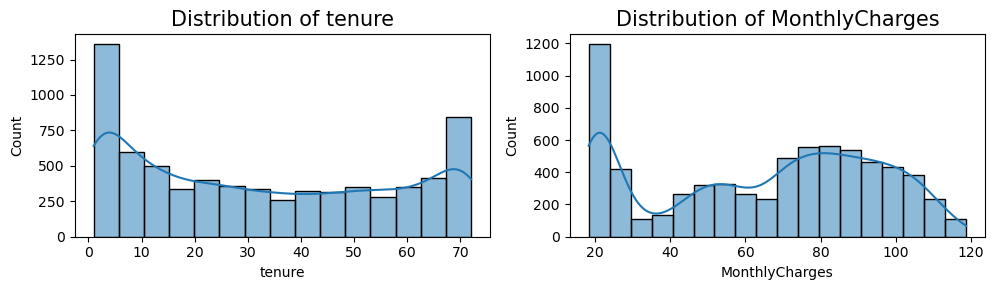

In [27]:
cols = 3
rows = int(np.ceil(len(cols_scaled) / cols))

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 3 * rows))
axes = axes.flatten()

for i, col in enumerate(cols_scaled):
    ax = axes[i]

    sns.histplot(df[col], kde=True, ax=ax)

    ax.set_title(f'Distribution of {col}', fontsize=15)

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- `tenure` and `MonthlyCharges` are not normally distributed, so I will using **MinMaxScaler**

In [28]:
scaler = MinMaxScaler()

df_dummies[cols_scaled] = scaler.fit_transform(df_dummies[cols_scaled])
df_dummies.describe()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,0.442560,1.325228,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,0.463166,0.265785,0.440273,0.216155,0.209329,0.239619,0.216297,0.336320,0.228100
std,0.368844,0.499729,0.457629,0.345708,0.642585,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,0.299363,0.441782,0.496455,0.411650,0.406858,0.426881,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.394366,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.518408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.760563,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.712562,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---

# Splitting Data

In [29]:
X = df_dummies.drop('Churn', axis=1)
Y = df_dummies.Churn
X.shape, Y.shape

((7032, 20), (7032,))

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, shuffle=True)

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size=0.8, shuffle=True)

Y_train.shape, Y_val.shape, Y_test.shape

((5625,), (1407,), (1407,))

In [31]:
Y_train.value_counts()

Churn
0    4121
1    1504
Name: count, dtype: int64

==> **IMBALANCED CLASSES**

# Building a Model

In [32]:
N_FEATURES = X.shape[1]
N_FEATURES

20

In [33]:
def model(X_train, y_train,
          X_val, y_val,
          X_test, y_test,
          epochs=100,
          class_weight_dict=None):

    # Define the model
    model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],), batch_size=64),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Define callbacks
    callbacks = [
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
    ]
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), class_weight=class_weight_dict, callbacks=callbacks)

    # Predict
    test_probs = model.predict(X_test)
    yp_test = np.where(test_probs > 0.5, 1, 0)

    # Evaluate
    cm = confusion_matrix(y_test, yp_test)
    report = classification_report(y_test, yp_test)

    return cm, report

In [34]:
def plot_cm(cm):
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Truth', fontsize=12)
    plt.title('Confusion Matrix')
    plt.show()

---

# Training with an Imbalanced Dataset

In [35]:
cm_1, report_1 = model(X_train, Y_train, X_val, Y_val, X_test, Y_test)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6448 - loss: 0.6078 - val_accuracy: 0.7953 - val_loss: 0.4303 - learning_rate: 0.0010
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7782 - loss: 0.4647 - val_accuracy: 0.8045 - val_loss: 0.4150 - learning_rate: 0.0010
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7787 - loss: 0.4536 - val_accuracy: 0.8109 - val_loss: 0.4113 - learning_rate: 0.0010
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7926 - loss: 0.4334 - val_accuracy: 0.8095 - val_loss: 0.4102 - learning_rate: 0.0010
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7941 - loss: 0.4343 - val_accuracy: 0.8088 - val_loss: 0.4098 - learning_rate: 0.0010
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7959 - loss: 0.4305 - val_accuracy: 0.8095 - val_loss: 0.4125 - learning_rate: 0.0010
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7972 - loss: 0.

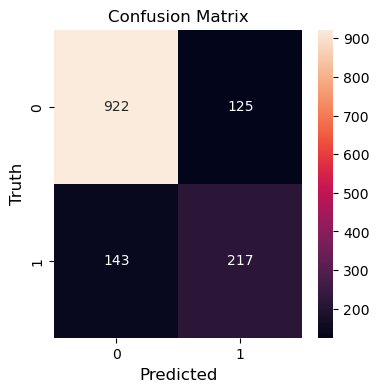

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1047
           1       0.63      0.60      0.62       360

    accuracy                           0.81      1407
   macro avg       0.75      0.74      0.75      1407
weighted avg       0.81      0.81      0.81      1407



In [36]:
plot_cm(cm_1)
print('-'*100)
print(report_1)

---

# Handling an Imbalanced Dataset

### Method 1: SMOTE (Synthetic Minority Over-sampling)

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE(sampling_strategy='minority', k_neighbors=5)  # using K-nearest Neighbours to over_sampling minority
X_smote, Y_smote = smote.fit_resample(X_train, Y_train)

In [39]:
Y_smote.value_counts()

Churn
1    4121
0    4121
Name: count, dtype: int64

- Now, classes are equal

In [40]:
cm_2, report_2 = model(X_smote, Y_smote, X_val, Y_val, X_test, Y_test)

Epoch 1/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6624 - loss: 0.6099 - val_accuracy: 0.7527 - val_loss: 0.4890 - learning_rate: 0.0010
Epoch 2/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7691 - loss: 0.4883 - val_accuracy: 0.7505 - val_loss: 0.4739 - learning_rate: 0.0010
Epoch 3/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7855 - loss: 0.4693 - val_accuracy: 0.7512 - val_loss: 0.4776 - learning_rate: 0.0010
Epoch 4/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7814 - loss: 0.4643 - val_accuracy: 0.7640 - val_loss: 0.4615 - learning_rate: 0.0010
Epoch 5/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7793 - loss: 0.4645 - val_accuracy: 0.7662 - val_loss: 0.4636 - learning_rate: 0.0010
Epoch 6/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7906 - loss: 0.4488 - val_accuracy: 0.7697 - val_loss: 0.4680 - learning_rate: 0.0010
Epoch 7/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7857 - loss: 0.

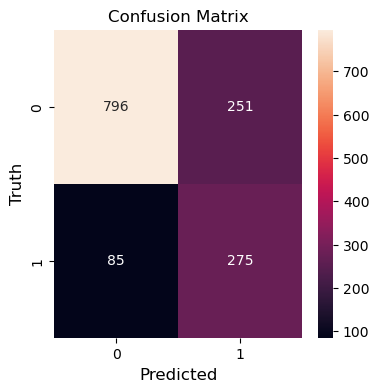

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1047
           1       0.52      0.76      0.62       360

    accuracy                           0.76      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.81      0.76      0.77      1407



In [41]:
plot_cm(cm_2)
print('-'*100)
print(report_2)

### Method 2: Assign Higher Weight to the Minority Class

In [42]:
def compute_class_weights(y_train):
    n_samples = len(y_train)
    class_names, counts = np.unique(y_train, return_counts=True)
    n_classes = len(class_names)

    class_weight_dict = {class_name: n_samples / (n_classes * count) for class_name, count in zip(class_names, counts)}
    return class_weight_dict

In [43]:
Y_train.value_counts()

Churn
0    4121
1    1504
Name: count, dtype: int64

In [44]:
class_weight_dict = compute_class_weights(Y_train)
class_weight_dict

{0: 0.6824799805872361, 1: 1.8700132978723405}

In [45]:
Y_train = np.asarray(Y_train).astype(int)
Y_val = np.asarray(Y_val).astype(int)
Y_test = np.asarray(Y_test).astype(int)

cm_3, report_3 = model(X_train, Y_train, X_val, Y_val, X_test, Y_test,
                       epochs=100,
                       class_weight_dict=class_weight_dict
                      )

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5978 - loss: 0.6406 - val_accuracy: 0.7655 - val_loss: 0.4778 - learning_rate: 0.0010
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7321 - loss: 0.5271 - val_accuracy: 0.7555 - val_loss: 0.4847 - learning_rate: 0.0010
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7384 - loss: 0.5036 - val_accuracy: 0.7562 - val_loss: 0.4749 - learning_rate: 0.0010
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7449 - loss: 0.5044 - val_accuracy: 0.7534 - val_loss: 0.4802 - learning_rate: 0.0010
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7473 - loss: 0.4968 - val_accuracy: 0.7505 - val_loss: 0.4824 - learning_rate: 0.0010
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7382 - loss: 0.5145 - val_accuracy: 0.7697 - val_loss: 0.4603 - learning_rate: 0.0010
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7562 - loss: 0

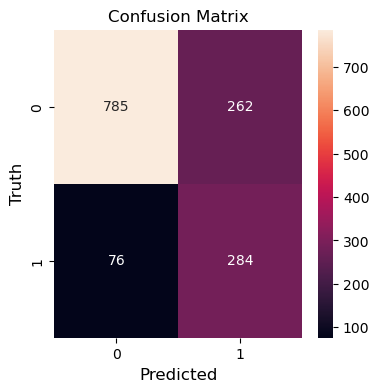

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1047
           1       0.52      0.79      0.63       360

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.81      0.76      0.77      1407



In [46]:
plot_cm(cm_3)
print('-'*100)
print(report_3)

---

# Conclusion

### Without Handling Imbalanced

- The company fails to identify many customers at risk of leaving, leading to missed opportunities to retain them.

- Financial Impact: Lost revenue due to preventable churn.

### Using SMOTE
- The company can proactively offer retention discounts but might waste resources on customers who weren’t going to leave.

- Financial Impact: More churn reduction, but some unnecessary retention costs.

### Using Class Weights
- The company reduces churn further but risks offering discounts to customers who would have stayed anyway.

- Financial Impact: Best churn prevention but higher retention costs compared to the first method.

---